In [1]:
from PIL import Image
import matplotlib.pyplot as py
from torchvision import transforms, models
import torchvision
import json
import torch

vgg = models.vgg19(pretrained=True)
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
import os 
f = os.listdir("/home/user/Desktop/test")
basedir = "/home/user/Desktop/test"

for i in f:
    print(i)

FileNotFoundError: [Errno 2] No such file or directory: '/home/user/Desktop/test'

In [14]:
images = []

for i in f:
    print(os.path.join(basedir,i))
    images.append(Image.open(os.path.join(basedir,i)).convert('RGB'))

/home/user/Desktop/test/tiger.jpeg
/home/user/Desktop/test/goldfish.jpeg


In [15]:
len(images)

2

In [18]:
images_tensor = []
for img in images :
    max_size = 224
    if(max(img.size)>max_size):
        size = max_size
    else:
        size = max(img.size)

    in_transform = transforms.Compose([
                        torchvision.transforms.CenterCrop(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406),
                                            (0.229, 0.224, 0.225))])

    img_tensor = in_transform(img)
    img_tensor = img_tensor.unsqueeze(0)
    images_tensor.append(img_tensor)
    print(img_tensor.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


In [26]:
images_tensor[0].shape

torch.Size([1, 3, 224, 224])

In [21]:
def imshow2(inp, title = None):
    mean_nums = [0.485, 0.456, 0.406]
    std_nums = [0.229, 0.224, 0.225]
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([mean_nums])
    std = np.array([std_nums])
    inp = std * inp + mean
    inp = np.clip(inp, 0 , 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

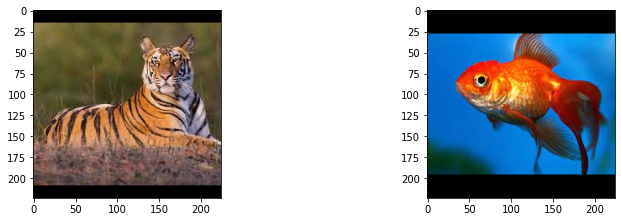

In [29]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
columns = 3
rows = 5
for i in range(1, len(images_tensor)+1):
    if(i<=12):
        fig.add_subplot(rows, columns, i)
        imshow2(images_tensor[i-1].squeeze(0))

    else:
        img = torch.zeros(1,3,224,224)
plt.show()

In [30]:
output = []

for i in range(len(images_tensor)):
    input = images_tensor[i].to(device)
    output_vgg = vgg(input).detach().to('cpu')
    output.append(torch.argmax(output_vgg))

In [32]:
print(output_vgg)

tensor([[ 2.0427e+01,  4.3016e+01,  2.2060e+00,  5.6320e+00,  5.2079e+00,
          1.5837e+01,  2.9542e+00,  8.3274e+00,  9.7859e+00, -2.4569e+00,
          1.1628e+00, -8.4128e-01,  7.3893e+00, -5.0581e+00,  3.2372e+00,
          2.3297e+00, -2.7528e+00, -4.2459e+00, -7.3191e+00, -6.9234e+00,
         -6.0504e+00,  3.6962e+00, -2.7739e-01,  4.4815e+00, -6.2210e+00,
          8.1948e+00,  1.2307e+01,  1.6157e+01,  1.0662e+01,  1.6455e+01,
          5.2268e+00,  1.3816e+01,  1.5735e+01,  5.7998e+00,  1.5545e-01,
          4.2847e+00,  8.6060e+00,  7.6161e+00,  2.0825e+01,  1.1764e+01,
          1.5078e+01,  9.7100e+00,  1.7801e+01,  1.2598e+01,  9.9458e+00,
          8.8811e+00,  1.6051e+01,  1.5786e+01,  6.4089e+00,  1.8444e+00,
          5.2060e+00,  1.8269e+01, -2.9466e+00, -7.3738e-01, -5.1255e-01,
          2.9591e+00, -7.0010e-01, -5.3208e+00, -4.1960e-01,  2.6232e+00,
          3.5321e-01, -3.1168e+00,  2.0718e+00,  4.4366e+00,  6.2192e+00,
          1.4635e+00,  3.0470e+00, -3.

In [31]:
output

[tensor(292), tensor(1)]

In [33]:
labels=[]

In [35]:
with open('/home/user/Downloads/imagenet_class_index.json') as f:
    data = json.load(f)

In [36]:
data

n02823428', 'beer_bottle'],
 '441': ['n02823750', 'beer_glass'],
 '442': ['n02825657', 'bell_cote'],
 '443': ['n02834397', 'bib'],
 '444': ['n02835271', 'bicycle-built-for-two'],
 '445': ['n02837789', 'bikini'],
 '446': ['n02840245', 'binder'],
 '447': ['n02841315', 'binoculars'],
 '448': ['n02843684', 'birdhouse'],
 '449': ['n02859443', 'boathouse'],
 '450': ['n02860847', 'bobsled'],
 '451': ['n02865351', 'bolo_tie'],
 '452': ['n02869837', 'bonnet'],
 '453': ['n02870880', 'bookcase'],
 '454': ['n02871525', 'bookshop'],
 '455': ['n02877765', 'bottlecap'],
 '456': ['n02879718', 'bow'],
 '457': ['n02883205', 'bow_tie'],
 '458': ['n02892201', 'brass'],
 '459': ['n02892767', 'brassiere'],
 '460': ['n02894605', 'breakwater'],
 '461': ['n02895154', 'breastplate'],
 '462': ['n02906734', 'broom'],
 '463': ['n02909870', 'bucket'],
 '464': ['n02910353', 'buckle'],
 '465': ['n02916936', 'bulletproof_vest'],
 '466': ['n02917067', 'bullet_train'],
 '467': ['n02927161', 'butcher_shop'],
 '468': ['n0

In [38]:
for i in output:
    labels.append(data[str(i.item())][1])

In [39]:
labels

['tiger', 'goldfish']

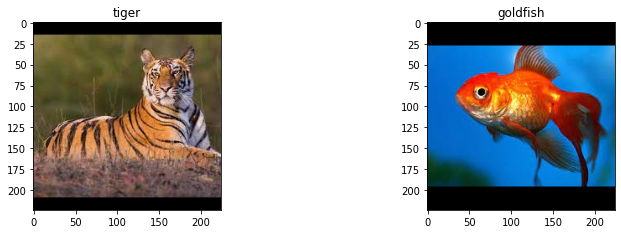

In [42]:
fig = plt.figure(figsize=(20,20))
columns = 3
rows = 5
for i in range(1, len(images_tensor)+1):
    if(i<=12):
        fig.add_subplot(rows, columns, i)
        imshow2(images_tensor[i-1].squeeze(0), labels[i-1])

    else:
        img = torch.zeros(1,3,224,224)

plt.show()